# 3. 신경망
## 3.1 신경망의 구조
### 3.1.1 신경망의 예
- 입력층(input layer), 은닉층(hidden layer), 출력층(output layer)으로 구성
- 은닉층의 뉴런은 보이지 않음

### 3.1.2 퍼셉트론 복습
- 퍼셉트론(perceptron): 다수의 신호를 입력으로 받아 하나의 신호를 출력, 인지에 대한 기본단위
$$y = \begin{cases} 0 & (b + w_1x_1 + w_2x_2 \leq 0) \\ 1 & (b + w_1x_1 + w_2x_2 > 0) \end{cases}$$
- $b$: 편향(bias) , 뉴런이 얼마나 쉽게 활성화되는지 제어
- $w_1, w_2$: 가중치(weight), 각 신호의 영향력 제어
- $x_1, x_2$: 입력 신호
- $y$: 출력



### 3.1.3 활성화 함수등장
- 활성화 함수(activation function): 입력 신호의 총합을 출력 신호로 변환하는 함수
- 활성화 함수를 이용해 신경망의 표현력을 높일 수 있음
- 단순 퍼셉트론은 단층 네트워크에서 step function(계단 함수)를 활성화 함수로 사용한 모델
- 다층 퍼셉트론은 다층 네트워크에서 sigmoid, ReLU 등의 매끈한 활성화 함수 사용
- unit-step function(활성함수)
    - 비선형 함수로 임계값을 기준으로 0과 1로 나눔
    - 임계값을 넘겨서 bias로 바꿈 hyposis함수 만듬

$y = \begin{Bmatrix}  0, w_1x_1 + w_2x_2 <=\Theta
\\ 1, w_1x_1 + w_2x_2 > \Theta
\end{Bmatrix}$
## 3.2 활성화 함수
$$h(x) = \begin{cases} 0 & (x \leq 0) \\ 1 & (x > 0) \end{cases}$$
- 계단 함수(step function): 임계값을 경계로 출력이 바뀌는 함수

### 3.2.1 시그모이드 함수
$$h(x) = \frac{1}{1 + \exp(-x)}$$
- 시그모이드 함수(sigmoid function): 입력 신호의 총합을 0에서 1 사이의 값으로 변환
- 변환된 신호를 다음 뉴런에 전달



### 3.2.2 계단 함수 구현하기

In [2]:
def step_function(x):
    if x>0 :
        return 1
    else:
        return 0

In [3]:
import numpy as np
def step_fuction(x):
    y = x>0
    return y.astype(np.int)

In [4]:
x = np.array([-1.0, 1.0, 2.0]) 
y = x>0
y

array([False,  True,  True])

C:\Users\dmswl\AppData\Local\Temp\ipykernel_7568\3891679544.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x>0, dtype=np.int)


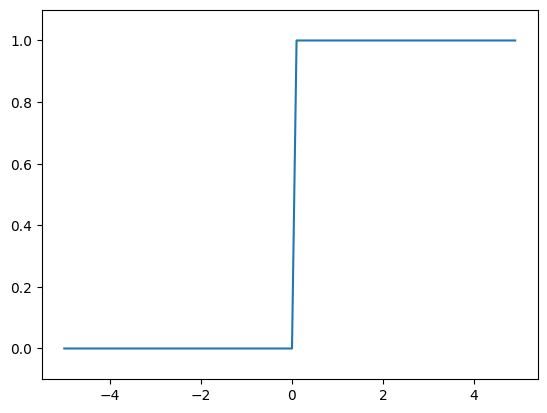

In [5]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x>0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### 3.2.4 시그모이드 함수 구현하기

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [7]:
t = np.array([1.0, 2.0, 3.0])
print(1.0 + t, 1.0/t)

[2. 3. 4.] [1.         0.5        0.33333333]


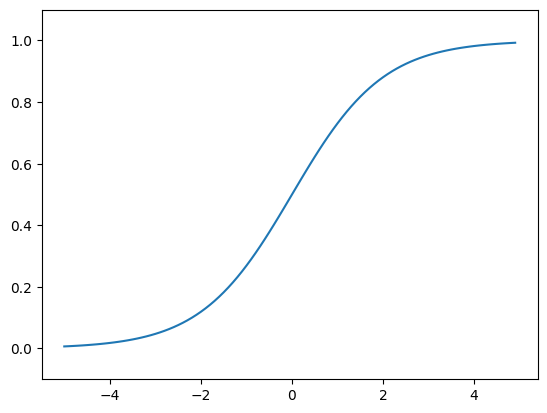

In [11]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### 3.2.5 시그모이드 함수와 계단 함수 비교
- 계단 함수: 0과 1 중 하나의 값만 출력
- 시그모이드 함수: 연속적인 실수를 출력
- 공통점 
    - 입력이 작을 때 출력이 0에 가깝고, 입력이 커지면 출력이 1에 가까워짐
    - 입력이 아무리 작거나 커도 출력은 0에서 1 사이


### 3.2.6 비선형함수
- 선형 함수 : 출력이 입력의 상수배만큼 변하는 함수
- 비선형 함수 : 직선 1개로는 그릴 수 없는 함수
- 신경망에서 활성화 함수로 선형함수를 이용하면 신경망의 층을 깊게 하는 의미가 없어짐 -> 어차피 상수배가 되어 은닉층 없이 구현될 수 있음
- tanh, ReLU 등의 비선형 함수를 사용

### 3.2.7 ReLU 함수
$$h(x) = \begin{cases} x & (x > 0) \\ 0 & (x \leq 0) \end{cases}$$
- ReLU 함수(Rectified Linear Unit): 입력이 0을 넘으면 그 입력을 그대로 출력, 0 이하일때 0을 출력

In [12]:
def relu(x):
    return np.maximum(0, x)

## 3.3 다차원 배열의 계산
### 3.3.1 다차원 배열
- 다차원 배열: 행렬(matrix)을 일반화한 개념
- 배열의 차원 수 : np.ndim()
- 배열의 형상(shape): np.shape()
- 배열의 데이터 타입(dtype): np.dtype()

In [13]:
import numpy as np
A = np.array([1, 2, 3, 4])
print(np.ndim(A), A.shape, A.shape[0])

1 (4,) 4


In [14]:
B = np.array([[1,2], [3,4], [5,6]])
print(np.ndim(B), B.shape)

2 (3, 2)


### 3.3.2 행렬의 내적(행렬 곱)
- 행렬의 내적: np.dot(A, B)
- 행렬의 형상이 다를 경우 내적 불가능

In [15]:
A = np.array([[1,2], [3,4]])
B = np.array([[5,6], [7,8]])
print(np.dot(A, B))

[[19 22]
 [43 50]]


In [17]:
A = np.array([[1,2,3], [4,5,6]])
B = np.array([[1,2], [3,4], [5,6]])
print(np.dot(A, B))

[[22 28]
 [49 64]]


In [18]:
C = np.array([[1,2], [3,4]])
print(A.shape, C.shape)
print(np.dot(A, C))

(2, 3) (2, 2)


ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

In [19]:
A = np.array([[1,2], [3,4], [5,6]])
B = np.array([7,8])
print(np.dot(A, B))

[23 53 83]


### 3.3.3 신경망의 내적
- 다차원 배열 내적 구하는 np.dot으로 한번에 결과 Y 계산

In [20]:
X = np.array([1, 2])
W = np.array([[1, 3, 5], [2, 4, 6]])
Y = np.dot(X, W)
print(Y)

[ 5 11 17]


## 3.4 3층 신경망 구현하기
- 입력층(0층) : 2개의 뉴런
- 첫 번째 은닉층(1층) : 3개의 뉴런
- 두 번째 은닉층(2층) : 2개의 뉴런
- 출력층(3층) : 2개의 뉴런

### 3.4.1 표기법 설명
- 가중치: $W^{(1)}_{1 2}$
- $^{(1)}$ : 1층의 가중치
- $_1$ : 다음층의 1번 째 뉴런
- $_2$ : 앞층의 2번 째 뉴런

### 3.4.2 각 층의 신호 전달 구현하기
- $a^{(1)}_1 = W^{(1)}_{11}x_1 + W^{(1)}_{21}x_2 + b^{(1)}_1$
- $A^{(1)} = XW^{(1)} + B^{(1)}$
- $A^{(1)} = (a^{(1)}_1, a^{(1)}_2, a^{(1)}_3), X = (x_1, x_2), B^{(1)} = (b^{(1)}_1, b^{(1)}_2, b^{(1)}_3)$
- $W^{(1)} = \begin{pmatrix} W^{(1)}_{11} & W^{(1)}_{21} & W^{(1)}_{31} \\ W^{(1)}_{12} & W^{(1)}_{22} & W^{(1)}_{32} \end{pmatrix}$


In [24]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape, X.shape, B1.shape)
A1 = np.dot(X, W1) + B1
Z1 = sigmoid(A1)

print(A1, Z1)

W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

(2, 3) (2,) (3,)
[0.3 0.7 1.1] [0.57444252 0.66818777 0.75026011]


### 3.4.3 구현 정리

In [25]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## 3.5 출력층 설계하기
- 분류 : 데이터가 어느 클래스에 속하는지 결정하는 문제
- 회귀 : 입력 데이터에서 (연속적인) 수치를 예측하는 문제

### 3.5.1 항등 함수와 소프트맥스 함수 구현하기
- 항등 함수(identity function): 입력을 그대로 출력
- 소프트맥스 함수(softmax function): $y_k = \frac{\exp(a_k)}{\sum_{i=1}^{n}\exp(a_i)}$
- 소프트맥스 함수는 출력층의 각 뉴런이 모든 입력 신호에서 영향을 받음
- 지수화된 값의 합으로 나누어 확률로 변환

In [26]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
sum_exp_a = np.sum(exp_a)
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [27]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

### 3.5.2 소프트맥스 함수 구현 시 주의점
- 지수 함수를 사용하므로 오버플로 문제 발생 가능
- 임의의 정수를 양쪽에 곱해 로그화
- 일반적으로 입력 신호 중 최댓값을 빼주어 계산


In [28]:
a = np.array([0.3, 2.9, 4.0])
np.exp(a) / np.sum(np.exp(a))
c = np.max(a)
print( a - c, np.exp(a - c) / np.sum(np.exp(a - c)))

[-3.7 -1.1  0. ] [0.01821127 0.24519181 0.73659691]


In [ ]:
#오버플로우 막는 소프트맥스
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

### 3.5.3 소프트맥스 함수 특징
- 출력은 0에서 1 사이의 실수
- 출력의 총합은 1
- 확률로 해석 가능
- 출력층의 소프트맥스 함수는 생략 가능

In [29]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y, np.sum(y))

[0.01821127 0.24519181 0.73659691] 1.0


### 3.5.4 출력층의 뉴런 수 정하기
- 분류에서는 분류하고 싶은 클래스 수로 설정

## 3.6 손글씨 숫자 인식
- 순전파(forward propagation): 입력층에서 출력층으로 향하는 전달 과정
- MNIST 데이터셋: 손글씨 숫자 이미지 집합
    - 28x28 크기의 회색조 이미지로, 각 픽셀은 0에서 255까지의 값을 취함
- load_mnist : normalize, flatten, one_hot_label 3가지 옵션으로 데이터셋을 불러올 수 있음
    - normalize: 입력 이미지의 픽셀 값을 0.0 ~ 1.0 사이의 값으로 정규화
    - flatten: 입력 이미지를 1차원 배열로 만듦
    - one_hot_label: 레이블을 원-핫 인코딩으로 저장

In [30]:
import sys, os
sys.path.append(os.pardir)
from scratch.dataset.mnist import load_mnist
from PIL import Image

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)


Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [31]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from scratch.dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


### 3.6.2 신경망의 추론 처리
- 입력층 뉴런: 784개(28x28)
- 출력층 뉴런: 10개(0~9)
- 은닉층 뉴런: 50개, 100개 등 임의로 설정 가능

In [32]:
import pickle
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("scratch/ch03/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f) # 실행 당시 객체 즉시 복원

    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [33]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


### 3.6.3 배치 처리
- 배치(batch) : 하나로 묶은 입력 데이터\
     - 이미지 1장당 처리 시간을 줄이기 위해 여러장을 묶어 처리
     - 데이터 전송이 병목으로 작용하는 경우 배치 처리 함으로써 버스에 주는 부하 줄임(입출력 문맥교환 줄어듬)
- 다차원 배열의 대응하는 차원의 원소수가 일치함을 확인
- 후에 이미지 여러장을 한번에 묶어 넘김
- 배치 크기가 너무 큰 경우 : 메모리 부족, 속도 저하, gpu병렬처리 가능, 오버헤드 줄어들음
- 배치 크기가 너무 작은 경우 : 데이터 로딩으로 오버헤드 증가속도 저하, gpu의 계산 효율이 떨어짐(병렬처리 불가), gradient descent의 방향이 불안정해짐

In [34]:

x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

print(x.shape, x[0].shape, W1.shape, W2.shape, W3.shape)

(10000, 784) (784,) (784, 50) (50, 100) (100, 10)


In [36]:
x, t = get_data()
network = init_network()
batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [38]:
print(list(range(0, 10, 3)),list(range(0, 10)))


[0, 3, 6, 9] [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [39]:
x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6], [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])
y = np.argmax(x, axis=1)
print(y)

[1 2 1 0]


In [40]:
y = np.array([1, 2, 1, 0])
t = np.array([1, 2, 0, 0])
print(y == t)
np.sum(y == t)

[ True  True False  True]


3

## 3.7 정리
- 신경망에서 활성화 함수로 시그모이드, ReLU와 같은 매끄러운 함수 사용
- 넘파이의 다차원 배열로 신경망 효율적 구현
- 기계학습 무제는 회귀와 분류로 나누어짐
- 출력층의 활성와 함수는 회귀에서 주로 항등함수, 분류에서 소프트맥스 함수 사용
- 분류에서 출력층의 뉴런 수는 분류하려는 클래스 수와 같게 설정
- 배치는 입력 데이터를 묶은 것이며, 추론 처리를 위해 배치 단위로 진행하면 결과가 빨라짐

# 4. 신경망 학습
## 4.1 데이터에서 학습
- 가중치 매개변수의 값을 데이터로 보고 자동으로 결정
- 선형 분리 가능 문제는 유한번의 학습을 통해 풀 수 있으나(퍼셉트론 수렴 정리), 비선형 분리 문제는 자동으로 학습 할 수 없음

### 4.1.1 데이터 주도 학습
- 고차원에 대한 작업을 할 시 깊은 신경망을 사용해야하는데 weight가 늘어나고 조건수가 늘어나므로 데이터가 많아야 한다
- 데이터에서 특징(feature)을 추출하고, 이 특징의 패턴을 기계학습 기술로 학습
    - 특징은 입력 데이터에서 본질적인 데이터를 정확하게 추출할 수 있도록 설계된 변환기
    - 이미지의 특징은 주로 SIFT, SURF, HOG 등의 특징 사용(컴퓨터비전)
- 사람이 생각한 특징을 사용하는 방법도 있으나, 신경망은 이미지에 포함된 중요한 특징까지도 기계가 스스로 학습
- 신경망이 아닌 기계학습은 이미지를 벡터로 변환할 때 사용하는 특징을 여전히 사람이 설계해야함
- 딥러닝(신경망)을 종단간 기계학습(end-to-end machine learning)으로 데이터 입력에서 결과 출력까지 사람의 개입없이 얻음

### 4.1.2 훈련 데이터와 시험 데이터
- 기계학습 문제는 훈련 데이터와 시험 데이터로 나누어 학습과 실험을 수행
- 훈련 데이터로 학습한 모델의 범용 능력을 시험 데이터로 평가
- 범용 능력: 아직 보지 못한 데이터로도 올바르게 판단하는 능력
- 오버피팅(overfitting): 한 데이터셋에만 지나치게 최적화된 상태
    - 오버피팅을 줄이기 위해 모델단순화, 데이터 추가, 드롭아웃, regulazation 등의 방법 사용 

## 4.2 손실함수
- 신경망 학습에서 신경망 성능의 나쁨을 나탄는 지표, 현재 신경망이 훈련 데이터를 얼마나 잘 처리하지 못하느냐를 나타냄
- 손실함수의 값이 작을수록 좋음

### 4.2.1 평균제곱오차
$$E = \frac{1}{2}\sum_{k}(y_k - t_k)^2$$
- $y_k$: 신경망의 출력
- $t_k$: 정답 레이블
- $k$: 데이터 차원 수
- 추정값이 가우시안 분포를 따른다고 가정할 때, 평균제곱오차 함수를 최소화하는 것은 최대우도추정과 같음

In [41]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [42]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [44]:
print(mean_squared_error(np.array(y), np.array(t)))
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(mean_squared_error(np.array(y2), np.array(t)))

0.09750000000000003
0.5975


### 4.2.2 교차 엔트로피 오차
$$E = -\sum_{k}t_k\log y_k$$
- $y_k$: 신경망이 k라고 예측한 확률 출력
- $t_k$: 정답 레이블, 정답에 해당하는 인덱스의 원소만 1(원핫인코딩)
- 정답일 때 추정의 자연로그 계산
- 정답일 때 출력이 전체 값을 정함
- 엔트로피: 정보량의 기댓값, 확률이 낮을수록 어떤 정보일지 확실하지 않음
- 손실함수는 최소화하기 위해 -붙임
- 확률을 계속 곱하면 0에 수렵하므로 곱하기를 더하기로 바꾸는 log함수사용
- 이진분류일 경우는p,q에서 q==1이 되는 값 찾기
- 베르누이 분포에서는 mse보다 ㅡ로스엔트로피를 씀 -> sfotmax와 결이 맞으므로

In [45]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

print(cross_entropy_error(np.array(y), np.array(t)))
print(cross_entropy_error(np.array(y2), np.array(t)))

0.510825457099338
2.302584092994546


### 4.2.3 미니배치 학습
- 훈련 데이터 모두에 대한 손실함수의 합을 구하는 것은 현실적이지 않음
- 데이터 일부를 추려 전체의 근사치로 이용
- 미니배치(mini-batch): 훈련 데이터 중 일부를 무작위로 가져와 학습

In [46]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from scratch.dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape, t_train.shape)

(60000, 784) (60000, 10)


In [48]:
# 무작위로 빼내기
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

np.random.choice(60000, 10)

array([ 5669, 20293, 57867,  8008, 37275, 53587,  4410, 14693,   759,
       10021])

### 4.2.4 배치용 교차 엔트로피 오차
- 데이터가 하나인 경우와 미니배치인 경우 모두 처리할 수 있도록 구현
- 정답 레이블이 원-핫 인코딩이 아닌 경우도 처리 가능

In [49]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size
    # return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size  : 원핫인코딩


### 4.2.5 손실함수 설정 이유
- 정확도를 높게 하는 매개변수 값을 찾는 것이 목표
- __정확도는 매개변수의 미분이 대부분의 장소에서 0이 되어 매개변수를 갱신할 수 없음__ 
    - 정확도는 개선된다 하더라도 연속적인 변화가 아니므로 미분 불가하거나 매개변수를 약간 조정하는 정도에서 정확도는 개선되지 않음
- 손실함수는 미분값이 0이 되지 않아 학습 가능

## 4.3 수치 미분
- 미분: 한순간의 변화량
$$\frac{df(x)}{dx} = \lim_{h \to 0}\frac{f(x+h) - f(x)}{h}$$

### 4.3.1 미분
- 수치 미분: 아주 작은 차분으로 미분을 구하는 것
- 소수점 8자리 이하에서 반올림 오차 발생하므로 $h$를 작게 설정해야함
-  x를 중심으로 전후의 차분을 계산하므로 중앙차분이라고함
- 중앙차분은 진정한 접선(미분)과 값이 다름
$$\frac{df(x)}{dx} = \lim_{h \to 0}\frac{f(x+h) - f(x-h)}{2h}$$


In [51]:
# 미분
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x)) / (h)

# 수치미분(중앙차분)
def numerical_diff2(f,x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

### 4.3.2 수치 미분 예시
- $y = 0.01x^2 + 0.1x$

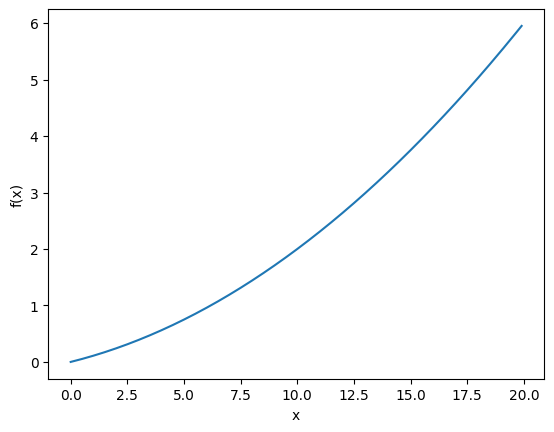

In [52]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [54]:
print(numerical_diff(function_1, 5), numerical_diff(function_1, 10))
numerical_diff2(function_1, 5), numerical_diff2(function_1, 10)

0.20000099999917254 0.3000009999976072


(0.1999999999990898, 0.2999999999986347)

### 4.3.3 편미분
- 변수가 여럿인 함수의 미분
$$f(x_0, x_1) = x_0^2 + x_1^2$$
- $x_0$에 대한 편미분 $$\frac{\partial f}{\partial x_0} = 2x_0$$

- $x_1$에 대한 편미분 
$$\frac{\partial f}{\partial x_1} = 2x_1$$

In [56]:
def function_2(x):
    return x[0]**2 + x[1]**2

# x0 = 3, x1 = 4일 때 x0에 대한 편미분
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

print(numerical_diff(function_tmp1, 3.0))

# x0 = 3, x1 = 4일 때 x1에 대한 편미분
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

print(numerical_diff(function_tmp2, 4.0))

6.000099999994291
8.00009999998963


## 4.4 기울기
- 모든 변수의 편미분을 벡터로 정리한 것
- __기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향__ 

In [57]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)

        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val

    return grad

print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


### 4.4.1 경사법
- 손실함수가 최솟값이 될때의 매개변수값
- 기울기로 함수의 최솟값을 찾으려는 것
- 기울기가 가르키는 방향아 최솟값인지 보장할 수 없음
    - 그소값이나 안장점일 가능성이 있으므로 고원 같은 학습이 진행되지 않는 정체기에 빠질 수 있음
- 학습률(learning rate): 매개변수 값을 갱신하는 양
    - 너무 크면 발산, 너무 작으면 학습이 잘 되지 않음
    - 적절한 학습률을 찾는 것이 중요

- 학습률과 같은 매개변수는 __하이퍼파라미터__ 로 사람이 직접 설정해야함
- 가중치와 편향은 기계가 자동으로 학습

In [58]:
# 경사하강법 구현
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x

# 문제 : f(x0, x1) = x0^2 + x1^2의 최솟값 구하기
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [59]:
# 학습률이 너무 큰경우
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100))

# 학습률이 너무 작은 경우
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100))


[-2.58983747e+13 -1.29524862e+12]
[-2.99999994  3.99999992]


### 4.4.2 신경망 기울기
- 가중치 매개변수에 대한 손실함수의 기울기
- 각원소에 대한 편미분으로 구함
- __$\frac{\partial L}{\partial W}$은 $W$와 형상이 같음 -> $2x3$ 행렬__ 

$$W = \begin{pmatrix} w_{11} & w_{21} & w_{31} \\ w_{12} & w_{22} & w_{32} \end{pmatrix}$$
$$\frac{\partial L}{\partial W} = \begin{pmatrix} \frac{\partial L}{\partial w_{11}} & \frac{\partial L}{\partial w_{21}} & \frac{\partial L}{\partial w_{31}} \\ \frac{\partial L}{\partial w_{12}} & \frac{\partial L}{\partial w_{22}} & \frac{\partial L}{\partial w_{32}} \end{pmatrix}$$

In [63]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from scratch.common.functions import softmax, cross_entropy_error
from scratch.common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

net = simpleNet()
print(net.W)d

x = np.array([0.6, 0.9])
p = net.predict(x)
print(p, np.argmax(p))

t = np.array([0, 0, 1])
print(net.loss(x, t))

[[-3.12681524e-01  1.18641083e+00 -7.23499232e-01]
 [ 1.65308563e+00 -7.08928369e-04 -2.51264374e-02]]
[ 1.30016815  0.71120846 -0.45671333] 0
2.3035479367546854


In [65]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

# or
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

[[ 0.34732509  0.19273217 -0.54005726]
 [ 0.52098764  0.28909826 -0.81008589]]


## 4.5 학습 알고리즘 구현하기
- 학습 :신경망의 가중치와 편항을 훈련 데이터에 적응하도록 조정하는 과정
- 추론 : 컴퓨터가 알아낸 wiehgt와 bias를 바탕으로 새로운 입력에 출력 계산
- 1단계 : 미니배치
    - 훈련 데이터 중 일부를 무작위로 가져옴, 미니 배치의 손실함수 값을 줄임
- 2단계 : 기울기 산출
    - 미니 배치의 손실 함수 값을 줄이기 위해 가중치 매개변수의 기울기 구함
    - 기울기는 손실함수를 가장 작게하는 뱡향 제시
- 3단계 : 매개변수 갱신
    - 가중치 매개변수를 기울기 방향으로 아주 조금 갱신
- 4단계 : 반복

- 미니배치로 무작위 선정한 데이터로 매개변수를 경사하강법을 사용해 갱신하면 확률적 경사하강법
- 층이 깊어질수록 기울기 손실 문제 발생
    - 해결 : 가중치 초기값을 적절히 설정, 활성화 함수로 ReLU 사용, 배치 정규화 사용, skip connection 사용

### 4.5.1 2층 신경망 클래스 구현하기
#### 변수
pramas

    - 신경망의 매개변수를 보관하는 딕셔너리 인스턴스 변수

    - params['W1']은 1번째 층의 가중치, params['b1']은 1번째 층의 편향

    - params['W2']은 2번째 층의 가중치, params['b2']은 2번째 층의 편향

grads

    - 기울기 보관하는 딕셔너리 인스턴스 변수(numerical_gradient() 메서드의 반환값)

    - grads['W1']은 1번째 층의 가중치의 기울기, grads['b1']은 1번째 층의 편향의 기울기

    - grads['W2']은 2번째 층의 가중치의 기울기, grads['b2']은 2번째 층의 편향의 기울기

#### 메서드
_ _ init _ _ (self, input_size, hidden_size, output_size, weight_init_std = 0.01)

    - 초기화 수행  
    - input_size: 입력층 뉴런 수  
    - hidden_size: 은닉층 뉴런 수  
    - output_size: 출력층 뉴런 수  
    - weight_init_std: 가중치 초기화 시 정규분포의 스케일  

predict(self, x)  
    - 예측(추론) 수행  
    - x: 이미지 데이터

loss(self, x, t)  
    - 손실함수의 값을 구함  
    - x: 이미지 데이터, t: 정답 레이블

accuracy(self, x, t)  
    - 정확도를 구함
  
numerical_gradient(self, x, t)  
    - 가중치 매개변수의 기울기를 수치 미분 방식으로 구함

gradient(self, x, t)  
    - 가중치 매개변수의 기울기 성능개선(오차역전법 체인룰)




In [66]:
import sys, os
sys.path.append(os.pardir)
from scratch.common.functions import *
from scratch.common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y
    
    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads


In [67]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape, net.params['b1'].shape, net.params['W2'].shape, net.params['b2'].shape)

x = np.random.rand(100, 784)
y = net.predict(x)
t = np.random.rand(100, 10)

grads = net.numerical_gradient(x, t)
print(grads['W1'].shape, grads['b1'].shape, grads['W2'].shape, grads['b2'].shape)
# 수치미분으로 매개변수 기울기 계산시 오래걸림

(784, 100) (100,) (100, 10) (10,)


KeyboardInterrupt: 

## 4.5.2 미니배치 학습 구현
- 훈련 데이터 중 일부를 무작위로 가져와 학습

In [ ]:
import numpy as np
from scratch.dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

# 하이퍼 파라미터 설정
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grad = network.numerical_gradient(x_batch, t_batch)

    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

### 4.5.3 시험 데이터로 평가
- 훈련 데이터에만 지나치게 최적화되어 범용성을 잃는 __오버피팅__ 문제
- 오버피팅을 방지하기 위해 시험 데이터로 정확도 평가
- Epoch : 학습에서 훈련 데이터를 모두 소진했을 때의 횟수


In [ ]:
import numpy as np
from scratch.dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grad = network.numerical_gradient(x_batch, t_batch)

    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)

## 4.6 정리
- 기계학습에서 사용하는 데이터셋은 훈련, 시험으로 나눔
- 훈련 데이터로 학습한 모델의 범용 능력을 시험으로 평가
- 손실함수로 지표하여 손실 함수의 값이 작아지는 방향으로 가중치 매개변수 갱신
- 가중치 매개변수를 갱신할 시 가중치 매개변수의 기울기 이용하고 기울어진 방향으로 가중치의 값을 갱신하는 작업 반복
- 아주 작은 값을 주었을 때의 차분으로 미분을 구하는 수치미분을 이용해 가중치 매개변수의 기울기 구함
- 수치미분은 계산이 오래걸리지만 구현이 간단함

# 5. 오차역전파법
- 가중치 매개변수의 기울기를 효율적으로 계산하는 방법

## 5.1 계산 그래프
- 계산 과정을 그래프로 나타낸 것
- 그래프 자료구조, 복수의 노드와 엣지로 표현

### 5.1.1 계산 그래프로 풀다
- 문제1 : 1개에 100원인 사과를 2개 샀다. 소비세가 10%일 때 지불 금액은?
    - 100원 * 2개 = 200원 -> 10% 소비세 20원 -> 220원
- 문제2 : 1개에 100원인 사과를 2개, 1개에 150원인 귤을 3개 샀다. 소비세가 10%일 때 지불 금액은?
    - 100원 * 2개 + 150원 * 3개 = 650원 -> 10% 소비세 65원 -> 715원
1. 계산 그래프 구성
2. 그래프에서 계산을 왼쪽에서 오른쪽으로 진행

### 5.1.2 국소적 계산
- 계산 그래프의 특징은 각 노드의 계산이 국소적(관계된 작은범위) 계산이고, 노드끼리의 계산이 전파됨으로써 최종 결과를 얻음

### 5.1.3 왜 계산 그래프로 푸는가
- 국소적 계산으로 문제를 단순화할 수 있음
- 중간 계산 결과를 모두 보관할 수 있음
- 역전파를 통해 효율적으로 미분을 계산할 수 있음

## 5.2 연쇄법칙
- 합성 함수의 미분은 합성 함수를 구성하는 각 함수의 미분의 곱으로 나타낼 수 있음

### 5.2.1 계산 그래프의 역전파
- 역전파: 순전파와는 반대 방향으로 국소적 미분을 전달하는 것

### 5.2.2 연쇄법칙
- 합성 함수 : 여러 함수로 구성된 함수
- 합성 함수의 미분은 합성 함수를 구성하는 각 함수의 미분의 곱으로 나타낼 수 있음
$$z = t^2$$
$$t = x + y$$
$$\frac{dz}{dx} = \frac{dz}{dy}\frac{dy}{dx}$$
$$\frac{dz}{dt} = 2t$$
$$\frac{dt}{dx} = 1$$
$$\frac{dz}{dx} = \frac{dz}{dt}\frac{dt}{dx} = 2t * 1 = 2t = 2(x + y)$$


### 5.2.3 연쇄법칙과 계산 그래프
- 계산 그래프의 역전파는 연쇄법칙에 따라 국소적 미분을 곱하여 전달
- __역전파가 하는 일은 연쇄법칙의 원리와 같음__ 
$$\frac{\partial z}{\partial x} = 2(x+y)$$


## 5.3 역전파
### 5.3.1 덧셈 노드의 역전파
- $z = x + y$ 에서 $\frac{\partial z}{\partial x} = 1, \frac{\partial z}{\partial y} = 1$
- 상류에서 전해진 미분이 하류로 흘려짐
- 덧셈 노드의 역전파는 1을 곱하기만 할 뿐 입력된 값을 그대로 다음 노드로 전달


### 5.3.2 곱셈 노드의 역전파
- $z = xy$ 에서 $\frac{\partial z}{\partial x} = y, \frac{\partial z}{\partial y} = x$
- 상류의 값에 __순전파 때 입력 신호들을 서로 바꾼 값을 곱해 하류로 보냄__
- 곱셈 역전파는 순방향 입력 신호의 값이 필요하므로 순전파의 입력 신호 변수에 저장함

### 5.3.3 사과 쇼핑의 예
- 사과 가격, 사과 개수, 소비세라는 세 변수가 최종 금액에 어떻게 영향을 주느냐 해결
- 사과 개수에 대한 지불 금액 미분, 소비세에 대한 금액 미분, 사과 가격에 대한 지불 금액의 비분 계산

## 5.4 단순한 계층 구현하기
### 5.4.1 곱셈 계층
- forward() 순전파와 backward() 역전파 처리


In [68]:
class MulLayer:
    def __init__(self): # 변수 초기화
        self.x = None
        self.y = None

    def forward(self, x, y): # 순전파, x, y를 받아 곱셈 수행
        self.x = x
        self.y = y
        out = x * y

        return out

    def backward(self, dout): # 역전파, 상류에서 넘어온 미분을 받아 x, y에 대한 미분 계산
        dx = dout * self.y
        dy = dout * self.x

        return dx, dy
    
apple = 100
apple_num = 2
tax = 1.1

mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)
print(price)

# 역전파
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(dapple, dapple_num, dtax)


220.00000000000003


### 5.4.2 덧셈 계층

In [69]:
class AddLayer:
    def __init__(self): # 초기화가 필요없음
        pass

    def forward(self, x, y):
        out = x + y
        return out

    def backward(self, dout): # 상류에서 내려온 미분을 그대로 하류에 흘림
        dx = dout * 1
        dy = dout * 1
        return dx, dy
    
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
orange_price = mul_orange_layer.forward(orange, orange_num)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)
price = mul_tax_layer.forward(all_price, tax)
print(price)

# 역전파
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(price)
print(dapple_num, dapple, dorange, dorange_num, dtax)

715.0000000000001
715.0000000000001
110.00000000000001 2.2 3.3000000000000003 165.0 650


### 5.5.1 ReLU 계층
- ReLU 수식
    $y = x (x > 0), y = 0 (x \leq 0)$
- x에 대한 y의 미분 식
    $y = \frac{\partial L}{\partial y} (x > 0), y = 0 (x \leq 0)$
- 순전파에서 입력인 x가 0보다 크면 상류의 값을 그대로 하류에 보내고, 0보다 작을경우 하류로 신호를 보내지 않음(0을보냄)
-> ReLU는 전기회로의 스위치와 같음

In [70]:
class ReLU:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0

        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx
    
import numpy as np
x = np.array([[1.0, -0.5], [-2.0, 3.0]])
print(x)
mask = (x <= 0)
print(mask)

[[ 1.  -0.5]
 [-2.   3. ]]
[[False  True]
 [ True False]]


### 5.5.2 sigmoid 계층
- sigmoid 수식
    $y = \frac{1}{1 + \exp(-x)}$

- sigmoid 미분
1. / 노드로 $y = \frac{1}{x}$ 미분
    
    $\frac{\partial y}{\partial x} = \frac{1}{x^2} = -y^2$
    
    -> $-\frac{\partial L}{\partial y}y^2$
2. +노드로 상류의 값을 여과없이 보냄
    
    -> $-\frac{\partial L}{\partial y}y^2$
3. exp노드로 $y = exp(x)$ 연산 수행
    
    $\frac{\partial y}{\partial x} = exp(x)$
    
    -> $-\frac{\partial L}{\partial y}y^2exp(-x)$
4. x 노드로 순전파 때 값을 서로 바꿔 곱합(여기서는 -1)
    
    -> $\frac{\partial L}{\partial y}y^2exp(-x)$
    
따라서, $\frac{\partial L}{\partial y}y^2exp(-x) = \frac{\partial L}{\partial y}y(1-y)$

In [71]:
class sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out

        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

        return dx

## 5.6 Affine/Softmax 계층 구현하기
### 5.6.1 Affine 계층
- 신경망의 순전파 때 수행하는 행렬의 내적을 기하학에서는 어파인 변환(affine transformation)이라고 함

In [72]:
X = np.random.rand(2)
W = np.random.rand(2, 3)
B = np.random.rand(3)

print(X.shape, W.shape, B.shape)
Y = np.dot(X, W) + B 

(2,) (2, 3) (3,)


- Y를 활성화 함수로 변환해 다음 층으로 전파하는 것이 신경망 순전파의 흐름
- 행렬을 사용한 역전파는 행렬의 원소마다 전개해보면 스칼라값을 사용한 위의 방식과 같은 순서로 생각하면됨
$$\frac{\partial L}{\partial X} = \frac{\partial L}{\partial Y}W^T$$
$$\frac{\partial L}{\partial W} = X^T\frac{\partial L}{\partial Y}$$
- $W^T$는 행렬의 전치를 의미

- X와 $\frac{\partial L}{\partial X}$의 형상은 같음
- W와 $\frac{\partial L}{\partial W}$의 형상은 같음
$$X = \begin{pmatrix} x_1 & x_2 \\ x_3 & x_4 \end{pmatrix}$$
$$\frac{\partial L}{\partial X} = \begin{pmatrix} \frac{\partial L}{\partial x_1} & \frac{\partial L}{\partial x_2} \\ \frac{\partial L}{\partial x_3} & \frac{\partial L}{\partial x_4} \end{pmatrix}$$

### 5.6.2 배치용 Affine 계층
- 입력인 x의 형상이 (N,2)가 되고, 2차원에 맞게 행렬계산 하면 됨
- 편향 덧샘은 X * W 에 대한 편향이 각 데이터에 더해짐


In [74]:
X_dot_W = np.array([[0, 0, 0], [10, 10, 10]])
B = np.array([1, 2, 3])
print(X_dot_W + B)

dY = np.array([[1, 2, 3], [4, 5, 6]])
print(dY)
dB = np.sum(dY, axis=0)
print(dB)

[[ 1  2  3]
 [11 12 13]]
[[1 2 3]
 [4 5 6]]
[5 7 9]


In [75]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None

    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)

        return dx


### 5.6.3 Softmax-with-Loss 계층
- 입력값을 정규화하여 출력
- 소프트맥스 계층에 손실함수 교차 엔트로피 오차 포함하여 softmax-with-loss 계층으로 구현
- 소프트맥스 계층의 역전파는 $(y_1 - t_1, y_2 - t_2, y_3 - t_3)$로 정답 레이블과의 차이를 구함

In [76]:
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None
        self.t = None

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)

        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size

        return dx


## 5.7 오차역전파법 구현하기
### 5.7.1 신경망 학습의 전체 그림
- 전체
    1. 미니배치
    2. 기울기 계산 : 오차역전파법으로 기울기 계산
    3. 매개변수 갱신
    4. 1~3 반복

### 5.7.2 오차역전파법으로 구한 기울기 검증하기
- 이전 신경망에서 쌓이는 은닉층들을 Affine계층을 사용하고, softmaxwithloss 계층을 마지막 계층으로 사용
- 가중치 매개변수의 기울기를 오차역전법으로 구함

In [ ]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from scratch.common.layers import *
from scratch.common.gradient import numerical_gradient
from collections import OrderedDict

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = ReLU()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])

        self.lastLayer = SoftmaxWithLoss()
def predict(self, x):
    for layer in self.layers.values():
        x = layer.forward(x)

    return x

def loss(self, x, t):
    y = self.predict(x)
    return self.lastLayer.forward(y, t)

def accuracy(self, x, t):
    y = self.predict(x)
    y = np.argmax(y, axis=1)
    if t.ndim != 1: t = np.argmax(t, axis=1)

    accuracy = np.sum(y == t) / float(x.shape[0])
    return accuracy

def numerical_gradient(self, x, t):
    loss_W = lambda W: self.loss(x, t)

    grads = {}
    grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
    grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
    grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
    grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

    return grads
def gradient(self, x, t):
    self.loss(x, t)

    dout = 1
    dout = self.lastLayer.backward(dout)

    layers = list(self.layers.values())
    layers.reverse()
    for layer in layers:
        dout = layer.backward(dout)

    grads = {}
    grads['W1'] = self.layers['Affine1'].dW
    grads['b1'] = self.layers['Affine1'].db
    grads['W2'] = self.layers['Affine2'].dW
    grads['b2'] = self.layers['Affine2'].db

    return grads


### 5.7.3 오차역전파법을 사용한 학습 구현하기
- 수치미분의 결과와 오차역전파 결과를 비교해 오차역전파법이 제대로 구현되었는지 확인하는 기울기 확인 진행

In [ ]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from scratch.dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

for key in grad_numerical.keys():
    diff = np.average(np.abs(grad_backprop[key] - grad_numerical[key]))
    print(key + ":" + str(diff))

'''결과
W1:2.161013431743266e-13
b1:9.07425231386016e-13
W2:8.007279117077183e-13
b2:1.201261681202712e-10
'''

### 5.7.4 오차역전파법을 사용한 학습 구현하기

In [ ]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from scratch.dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grad = network.gradient(x_batch, t_batch)

    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)
        

## 5.8 정리
- 계산 그래프를 이용하면 시각적으로 과정을 파악할 수 있음
- 계산 그래프의 노드는 국소적 계산으로 진행하고 국소적 계산을 조합해 전체 계산을 구함
- 계산 그래프의 순전파는 통상의 계산을 수행하고 계산그래프의 역전파로 각 노드의 미분을 구할 수 있음
- 신경망의 구성 요소를 계층으로 구현하여 기울기를 효율적으로 계산할 수 있음
- 수치미분과 오차역전법의 결과를 비교하면 오차 역전법의 구현에 잘못이 없는지 확인할 수 있음

# 6. 학습관련 기술
## 6.1 매개변수 갱신
최적화 : 손실함수의 값을 가능한 낮추는 매개변수를 찾는 문제
- 확률적 경사 하강법(SGD) : 매개변수의 기울기를 구해 기울어진 방향으로 매개변수 값을 갱신

### 6.1.1 모험가 이야기
- 땅의 기울기를 이용해 지금 서있는 장소에서 가장 가파른 길을 찾아 내려가는 것

### 6.1.2 확률적 경사 하강법(SGD)
- 매개변수 공간에서 손실함수의 기울기를 구해 기울어진 방향으로 매개변수 값을 갱신
$$W \leftarrow W - \eta\frac{\partial L}{\partial W}$$

In [77]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr

    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]



- 최적화를 담당하는 클래스를 구분하고 기능을 모듈화

### 6.1.3 SGD의 단점
- 비등방성 함수(anisotropy function)에서는 탐색 경로가 비효율적
    - 비등방성 함수 : 방향에따라 성질이나 기울기가 달라짐
- SGD의 단점을 개선한 모멘텀, AdaGrad, Adam 등의 기법이 있음

### 6.1.4 모멘텀
- 모멘텀 : 운동량을 뜻하는 단어로, 기울기 방향으로 힘을 받아 물체가 가속됨

$$v \leftarrow \alpha v - \eta\frac{\partial L}{\partial W}$$

- v는 물체의 속도, m은 물체의 무게, F는 힘
- SGD와 비교했을 때 x축 방향으로 빠르게 다가가 지그재그의 움직임이 줄어듬

In [ ]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None

    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)

        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]
            

### 6.1.5 AdaGrad
- 학습률 감소 : 학습률을 서서히 낮추는 방법
- 매개변수의 원소마다 적응적으로 갱신 정도를 조정
- 행렬의 원소별 곱셈 후 학슙를 더해 갱신
$$h \leftarrow h + \frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W}$$
$$W \leftarrow W - \eta\frac{1}{\sqrt{h}}\frac{\partial L}{\partial W}$$
- 과거의 기울기를 계속 제곱해 더해 학습 진행시 갱신 강도가 약해짐
- 무한히 학습시 순간 갱신량이 0이 되어 갱신하지 않음
    - RMSProp : 지수이동평균을 사용해 과거 기울기의 반영 규모를 기하급수적으로 감소시킴, 과거의 기울기를 서서히 잊음


In [ ]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None

    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)

        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

### 6.1.6 Adam
- 공이 바닥을 구르는 듯한 모멘텀과 매개변수의 원소마다 적응적으로 갱신 정도를 조정하는 AdaGrad를 합침
- 하이퍼파라미터의 편향 보정이 진행됨
- 하이퍼파라미터를 3개 설정(학습률, 일차 모멘텀용 계수, 이차 모멘텀용 계수)


### 6.1.7 어느 갱신 방법을 이용할 것인가?

- 학습마다 장단점이 있어 적절한 기법을 선택해야함
- 하이퍼파라미터의 설정이 중요

### 6.1.8 MNIST 데이터셋으로 본 갱신 방법 비교
- MNIST 데이터셋으로 각 최적화 기법을 비교
- 학습 진도가 빠른 Adam이 가장 빠르게 학습
- SGD가 가장 느림(하이퍼파라미터에 따라 달라짐)